**Giovano Montemezzo Panatta**

 **Análise Exploratória de Dados - Boston Housing**

# Dicionário de Dados

- **CRIM**: Taxa de criminalidade per capita por cidade
- **ZN**: Proporção de terrenos residenciais zonados para lotes com mais de 25.000 pés quadrados
- **INDUS**: Proporção de acres de negócios não varejistas por cidade
- **CHAS**: Variável fictícia do Rio Charles (= 1 se o lote faz limite com o rio; 0 caso contrário)
- **NOX**: Concentração de óxidos nítricos (partes por 10 milhões)
- **RM**: Número médio de quartos por habitação
- **AGE**: Proporção de unidades ocupadas por proprietários construídas antes de 1940
- **DIS**: Distâncias ponderadas para cinco centros de emprego em Boston
- **RAD**: Índice de acessibilidade a rodovias radiais
- **TAX**: Taxa de imposto sobre propriedade de valor total por 10.000
- **PTRATIO**: Razão entre alunos e professores por cidade
- **LSTAT**: Porcentagem de status mais baixo da população
- **MEDV**: Valor da propriedade em 1.000


In [2]:
#Importando as bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


In [3]:
data = pd.read_csv('AT_BostonHousing_Data.csv', sep = ';')
data.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.090,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,49.671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,49.671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,60.622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,60.622,3,222,18.7,5.33,36.2


In [5]:
data_types = data.dtypes
print(data_types)

crim       float64
zn         float64
indus      float64
chas         int64
nox        float64
rm         float64
age        float64
dis        float64
rad          int64
tax          int64
ptratio    float64
lstat      float64
medv       float64
dtype: object


In [6]:
data.shape

(506, 13)

In [7]:
data.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
lstat      0
medv       0
dtype: int64

**Obs:** Nosso DF possui dados do tipo float e integer, 506 linhas e 13 colunas, além disso, não apresenta valores ausentes ou nulos.

**Selecionando três variáveis contínuas da base**: estamos criando um dataframe auxiliar com essas variáveis. A partir desse novo dataframe, estamos obtendo medidas estatísticas básicas, como média, mediana, percentis, entre outros, utilizando um único método da biblioteca Pandas.

**Variáveis numéricas contínuas escolhidas:**

* RM número médio de quartos por habitação
* AGE proporção de unidades ocupadas por proprietários construídas antes de 1940
* DIS distâncias ponderadas para cinco centros de emprego em Boston

In [ ]:
df_analise = data[['rm', 'age', 'dis']]

In [ ]:
df_analise.describe()

,rm,age,dis
count,506.000000,506.000000,506.000000
mean,6.284634,68.574901,33.836573
std,0.702617,28.148861,22.912317
min,3.561000,2.900000,1.137000
25%,5.885500,45.025000,17.930000
50%,6.208500,77.500000,27.533000
75%,6.623500,94.075000,47.648250
max,8.780000,100.000000,121.265000


Ao apresentar o **Boxplot** das três variáveis numéricas selecionadas, estamos observando a distribuição dos dados e identificando a presença de outliers. Essa visualização nos permite justificar a existência ou não de outliers para cada variável, baseando-nos na dispersão dos pontos em relação à mediana e aos quartis.

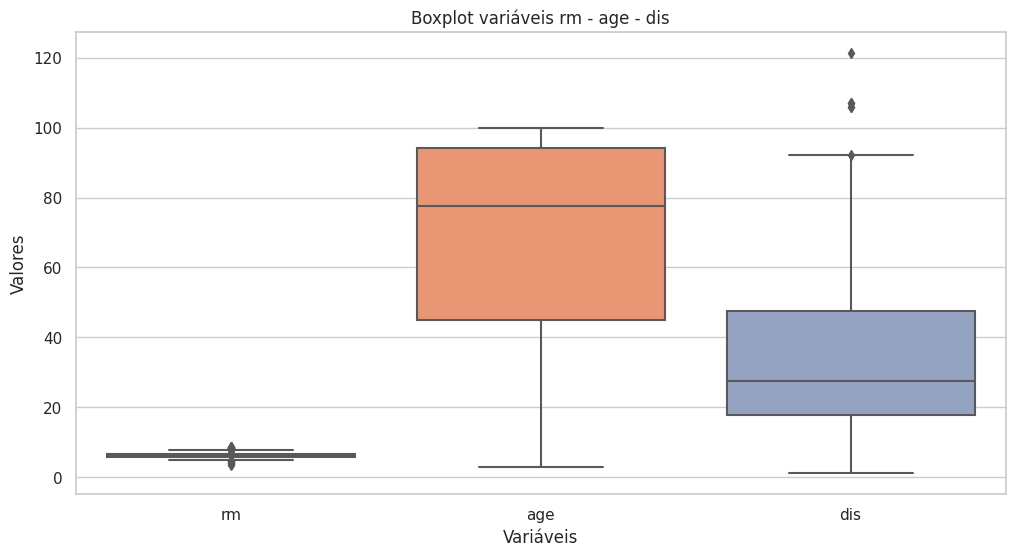

In [ ]:
sns.set(style= 'whitegrid')

plt.figure(figsize= (12, 6))
sns.boxplot(data=df_analise, palette='Set2')

plt.title("Boxplot variáveis rm - age - dis")
plt.xlabel('Variáveis')
plt.ylabel('Valores')

plt.show()

**Conclusão:** Com base no boxplot acima, podemos observar a presença de outliers na variável dis. A variável rm possui indícios de outliers, porém, não são muito substâncias.

Ao avaliar a variável "rm", estamos examinando seu comportamento estatístico e identificando a distribuição que melhor o representa. Uma boa forma de avaliar a distribuição de uma variável é através de um histograma:

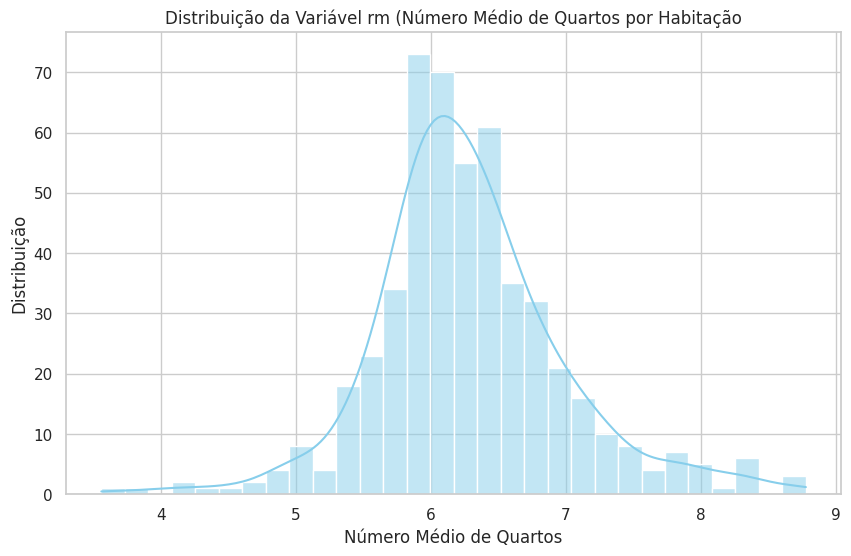

In [ ]:
plt.figure(figsize=(10, 6))

sns.histplot(df_analise['rm'], kde=True, bins=30, color='skyblue')

plt.title("Distribuição da Variável rm (Número Médio de Quartos por Habitação")
plt.xlabel("Número Médio de Quartos")
plt.ylabel("Distribuição")

plt.show()

**Considerações:** o histograma da variável "rm" indica que sua distribuição é bastante simétrica e em forma de sino, isso sugere uma distribuição normal. A maioria dos dados está próxima da média, com menos valores baixos e altos.

**Heatmap:** Ao empregar o dataframe original, estaremos construindo um mapa de calor para visualizar a correlação entre todas as variáveis iniciais do conjunto de dados. Isso nos permitirá identificar padrões de associação ou dependência entre as variáveis, representados por diferentes intensidades de cores no mapa.

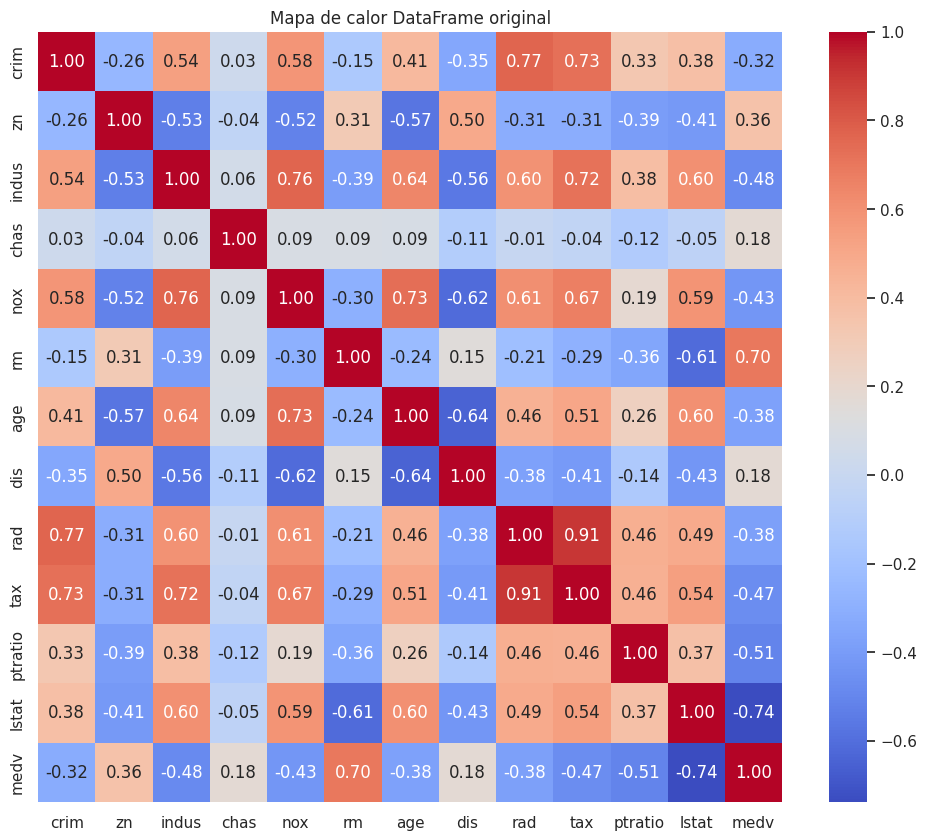

In [ ]:
plt.figure(figsize=(12, 10))
sns.heatmap(data.corr(), annot=True, fmt='.2f', cmap='coolwarm')

plt.title("Mapa de calor DataFrame original")
plt.show()

**Conclusão:** Baseando-nos no o heatmap acima e, uma vez que o problema consiste na previsão de preço a parir das características dos imóveis, podemos considerar que a variável dependente é a MEDV Valor da propriedade em $1.000's. Portanto, todas as demais variáveis são independentes e, a primeira vista, podem ser consideradas como preditoras.

Ao realizar o estudo das variáveis, criaremos uma matriz de diagramas de dispersão. Neste contexto, escolheremos três variáveis que seriam utilizadas para um eventual modelo para o problema apresentado anteriormente. A escolha será justificada com base na análise visual das relações entre essas variáveis e a variável-alvo, buscando identificar padrões ou tendências que possam ser relevantes para a modelagem do problema.

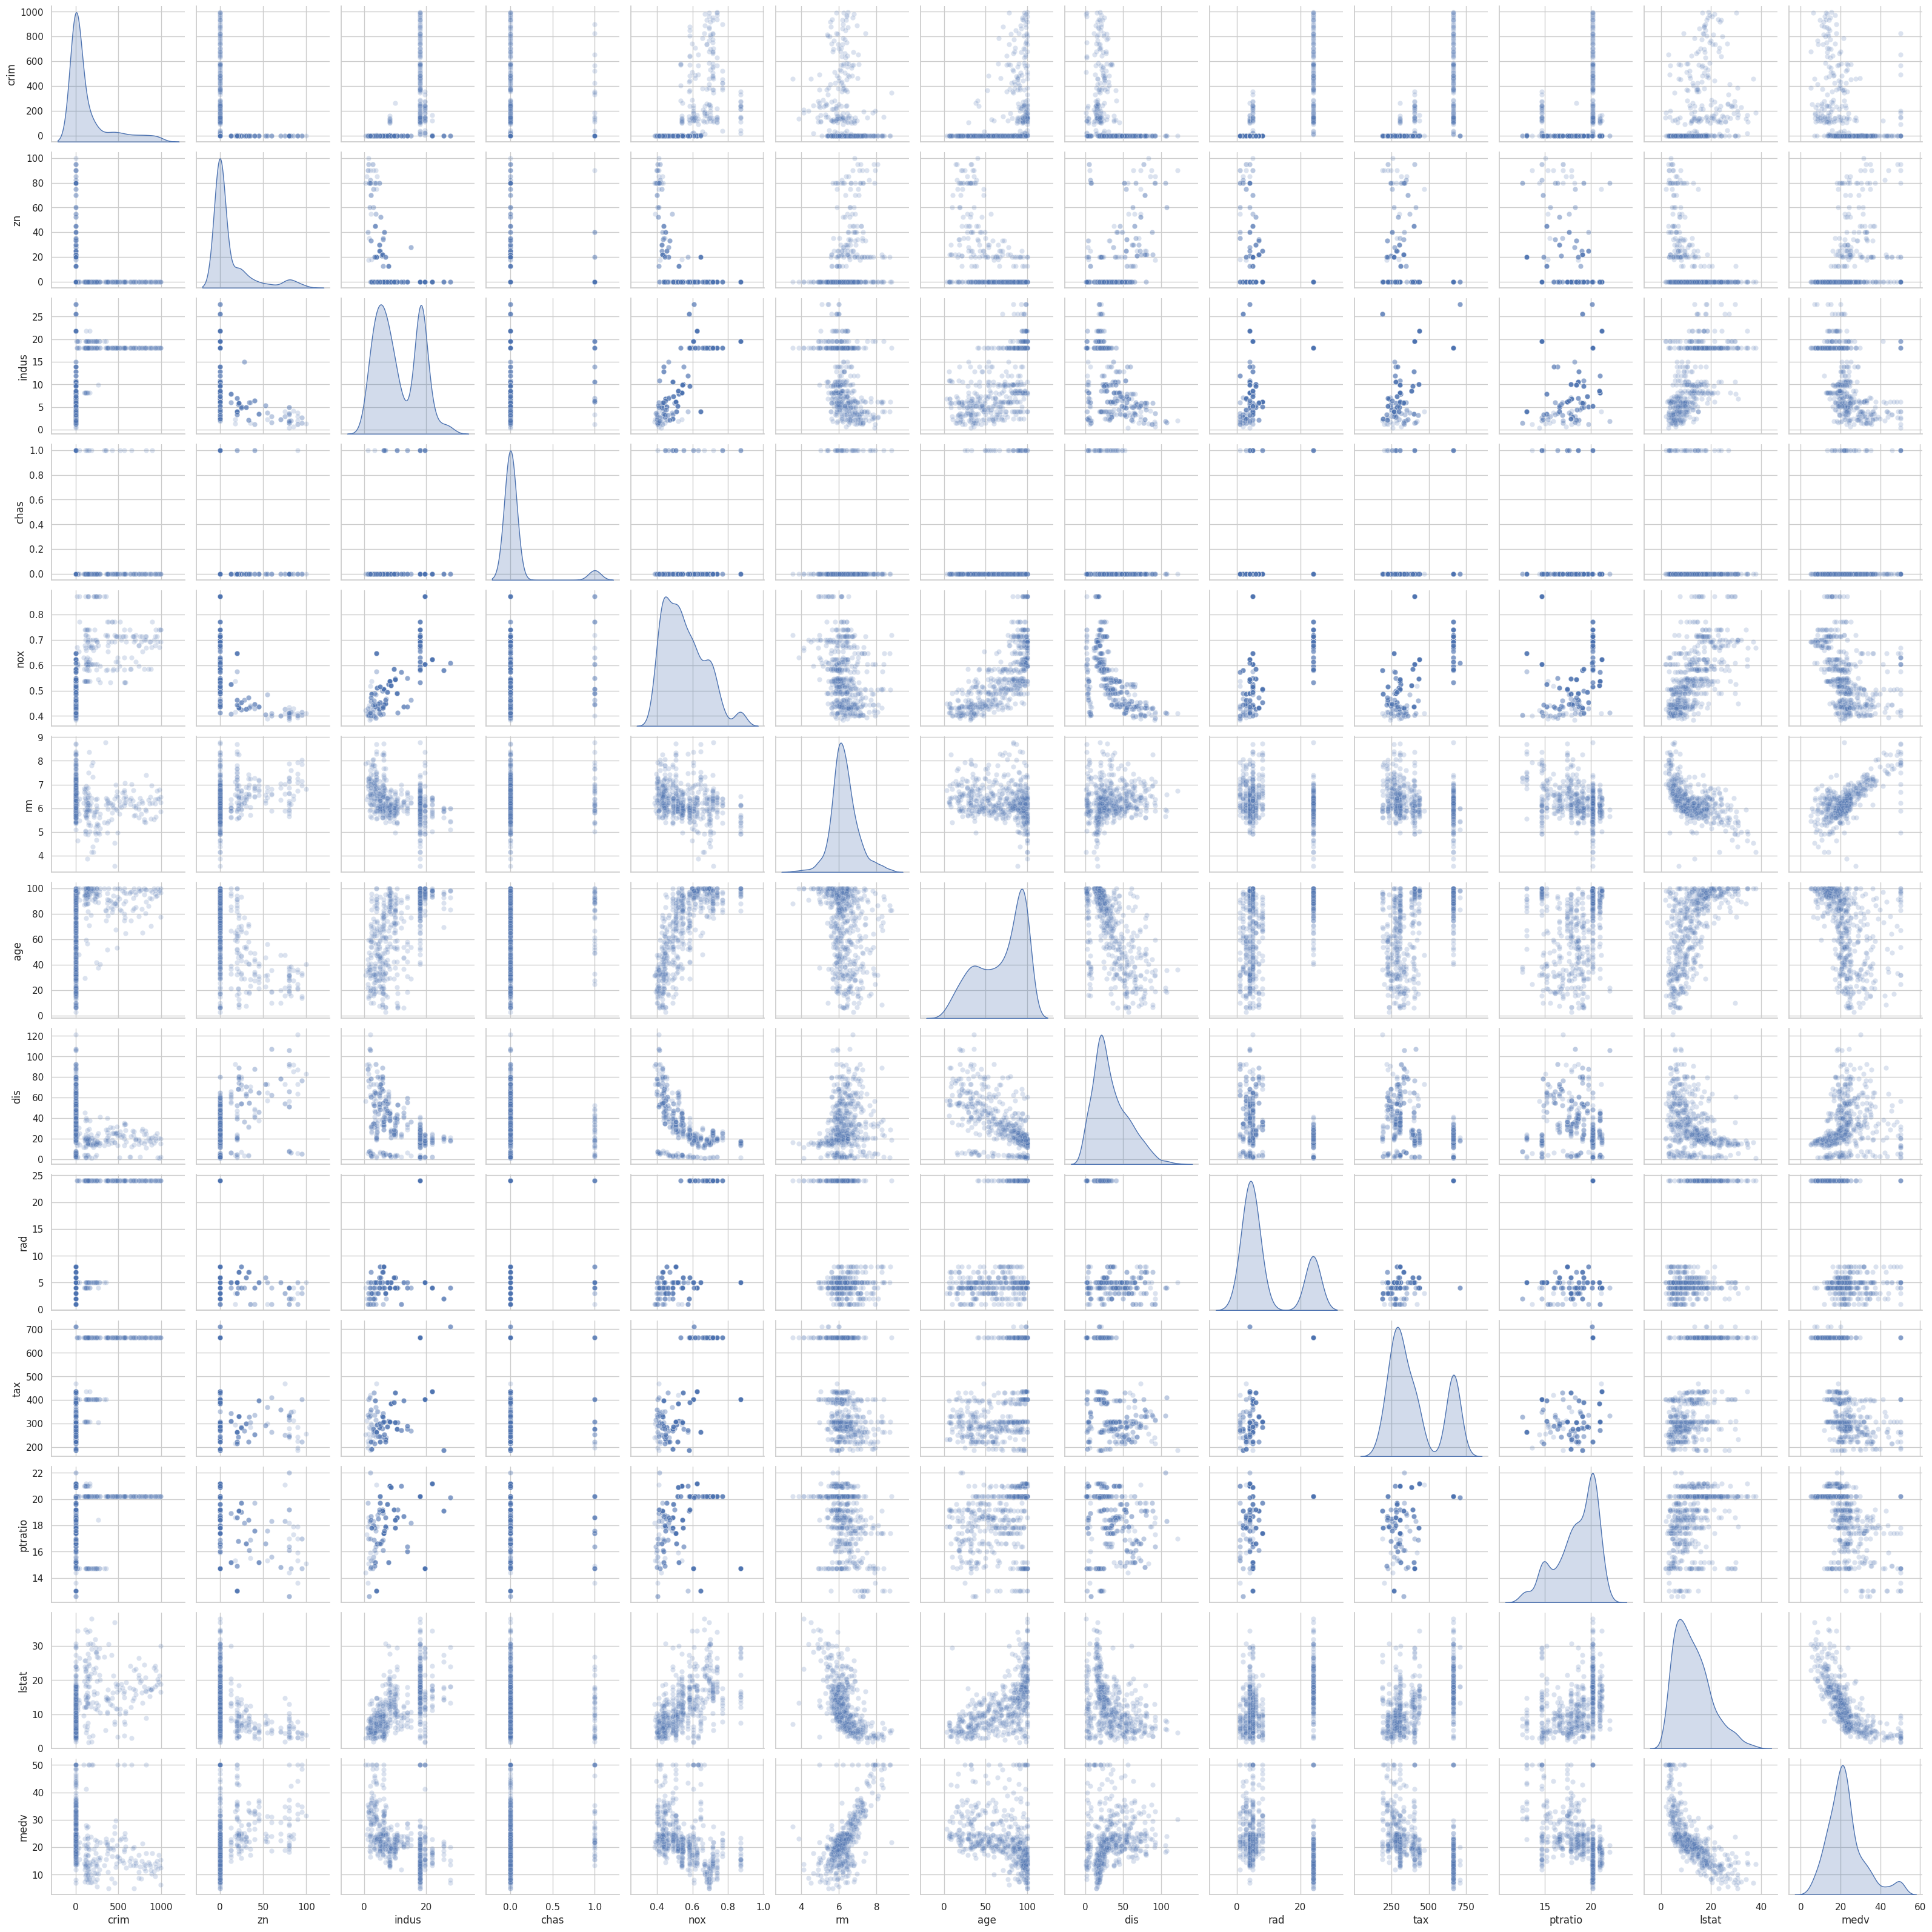

In [ ]:
sns.pairplot(data, diag_kind='kde', plot_kws={'alpha':0.2})
plt.show()


**Considerações:** Embora a matriz de diagramas de dispersão com todas as variáveis seja interessante para uma avaliação, creio que uma abordagem mais direta, eficiente e simplificada seja plotar um novo heatmap filtrando as variáveis mais correlacionadas tanto positiva quanto negativamente. Para isso, com base no heatmap anterior, utilizaremos as variáveis mais correlacionadas com a medv: acima de 0.5 e abaixo de -0.5. Para este caso, usaremos o valor absoluto .abs()

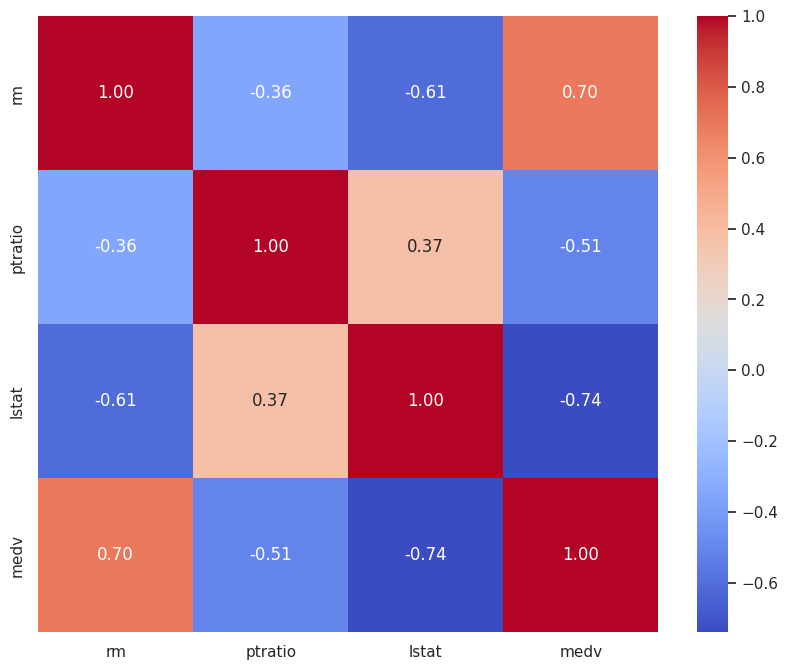

In [ ]:
correlation_matrix = data.corr()
threshold = 0.5 #limiar de correlação
strong_corr = correlation_matrix['medv'].abs() >= threshold
filtered_variables = strong_corr[strong_corr].index


plt.figure(figsize=(10, 8))
sns.heatmap(data[filtered_variables].corr(), annot=True, fmt=".2f", cmap='coolwarm')

plt.show()

**Com base no heatmpap acima e utilizando um valor de corte (absoluto) de 0.5, podemos concluir que as variáveis mais correlacionadas com nossa variável alvo são:**

* RM número médio de quartos por habitação: correlação positiva, indicando que quanto maior o número de  quartos, maior o valor do imóvel

* PTRATIO razão de alunos por professor por cidade: nessa variável, podemos observar uma correlação negativa, isso pode indicar que quanto maior a quantidade de alunos quanto ao número de professores, o preço dos imóveis tendem a diminuir. Podemos concluir que essa variável representa fatores socioeconômicos, ou seja, cidades com muitos alunos e poucos professores tendem a ter menor capital intelectual e, consequentemente, isso pode refletir na economia local diminuindo os preços dos imóveis.

* LSTAT % de status inferior da população: aqui encontramos outra variável moderadamente correlacionada (negativamente) com os preços dos imóveis. Isso quer dizer que quanto maior o percentual de pessoas com baixo status social, menor é o preço médio dos imóveis. Essa variável parece ter uma correlação positiva com PTRARIO. Indicando que cidades com menor nível educacional também possuem população com menor status social e vice-versa.

**Conclusão:** após a análise através do heatmap das variáveis mais correlacionadas positiva e negativamente com a nossa variável alvo (medv), para um modelo de machine learning, escolheríamos: rm, PTRATIO e LSTAT.

Vamos realizar uma separação do conjunto de dados em treino-teste-validação, onde utilizaremos 25% dos dados para teste e 75% para treino. Essa divisão nos permitirá avaliar o desempenho do modelo de forma mais precisa, garantindo uma boa generalização para dados não vistos.

In [ ]:
#Definindo as variáveis dependentes x e independente y
X = data[['rm', 'ptratio', 'lstat']]
y = data['medv']

#Separando os dados de treino e teste com seed 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

#Distribuição das variáveis
(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

((379, 3), (127, 3), (379,), (127,))

**Próximos passos:** Utilizaremos um boxplot para a visualização de possíveis outliers nas variáveis de treino e teste:

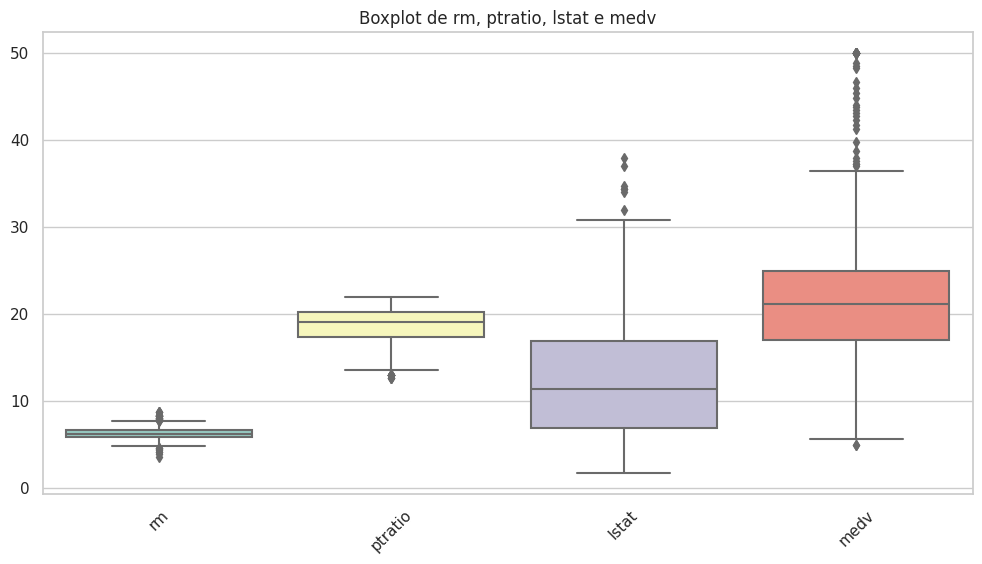

In [ ]:
variaveis = ['rm', 'ptratio', 'lstat', 'medv']

sns.set(style="whitegrid")
plt.figure(figsize=(12, 6)) 
sns.boxplot(data=data[variaveis], orient="v", palette="Set3")

plt.title("Boxplot de rm, ptratio, lstat e medv")
plt.xticks(rotation=45)

plt.show()

**Conclusões:** Considerando que em nossas variáveis de treino em seu formato original, possuem escalas bastante divergentes e, conforme demonstrado pelo resultado do nosso boxplot há também a presença de outliers, nossa abordagem será utilizar o escalonamento dos dados com StandardScaler. Essa técnica pode ser mais robusta na presença de outliers, desta forma, nossos dados estarão menos suscetíveis à distorções e, consequentemente, poderemos obter um resultado com melhor precisão em nosso modelo de aprendizado de máquina.

In [ ]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


Vamos ajustar o modelo de regressão linear simples utilizando apenas uma das três variáveis escolhidas na questão 06. Em seguida, calcularemos o RMSE para avaliar o desempenho do modelo.

In [ ]:
#Selecionando apenas uma variável (modelo simples de Regressão Linear)
X_train_simple = X_train[['rm']]
X_test_simple = X_test[['rm']]

# Aplicando o modelo de regressão linear
model = LinearRegression()
model.fit(X_train_simple, y_train)

# Realizando previsões no conjunto de teste
y_pred = model.predict(X_test_simple)

# Calculando o RMSE 
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(rmse)

6.53832084922458


**Conclusão:** com base no código acima, obtivemos um RMSE de 5.0684143671049595

Vamos ajustar um modelo de regressão linear múltipla utilizando as três variáveis escolhidas na questão 06. Em seguida, calcularemos o RMSE para avaliar o desempenho do modelo.

In [ ]:
model = LinearRegression()

#Treinando o modelo com as variáveis escalonadas
model.fit(X_train_scaled, y_train)

# Realizando previsões no conjunto de teste
y_pred = model.predict(X_test_scaled)

# Calculando o RMSE 
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(rmse)

5.0684143671049595


**Conclusão:** com base no código acima, obtivemos um RMSE de 5.0684143671049595

O modelo de regressão linear múltipla, que utilizou as três variáveis 'rm', 'ptratio' e 'lstat', teve um desempenho melhor do que o modelo de regressão linear simples, que usou apenas a variável 'rm'. Isso é evidenciado pelos valores de RMSE (Root Mean Squared Error) de cada modelo:

* Modelo de Regressão Linear Simples: RMSE = 6.5383
* Modelo de Regressão Linear Múltipla: RMSE = 5.0684


O RMSE mais baixo no modelo múltiplo indica que ele foi mais preciso na previsão dos valores das casas. Isso acontece porque o modelo múltiplo consegue capturar a influência de mais fatores no valor das casas, tornando suas previsões mais precisas.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=3d3c0dd4-052c-42ce-9a94-8346bfdd8b1c' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>